In [2]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
#hello
df_join = X.join(y)
#df_join.info()
cdc_diabetes_health_indicators.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


## Corr graph elimation 

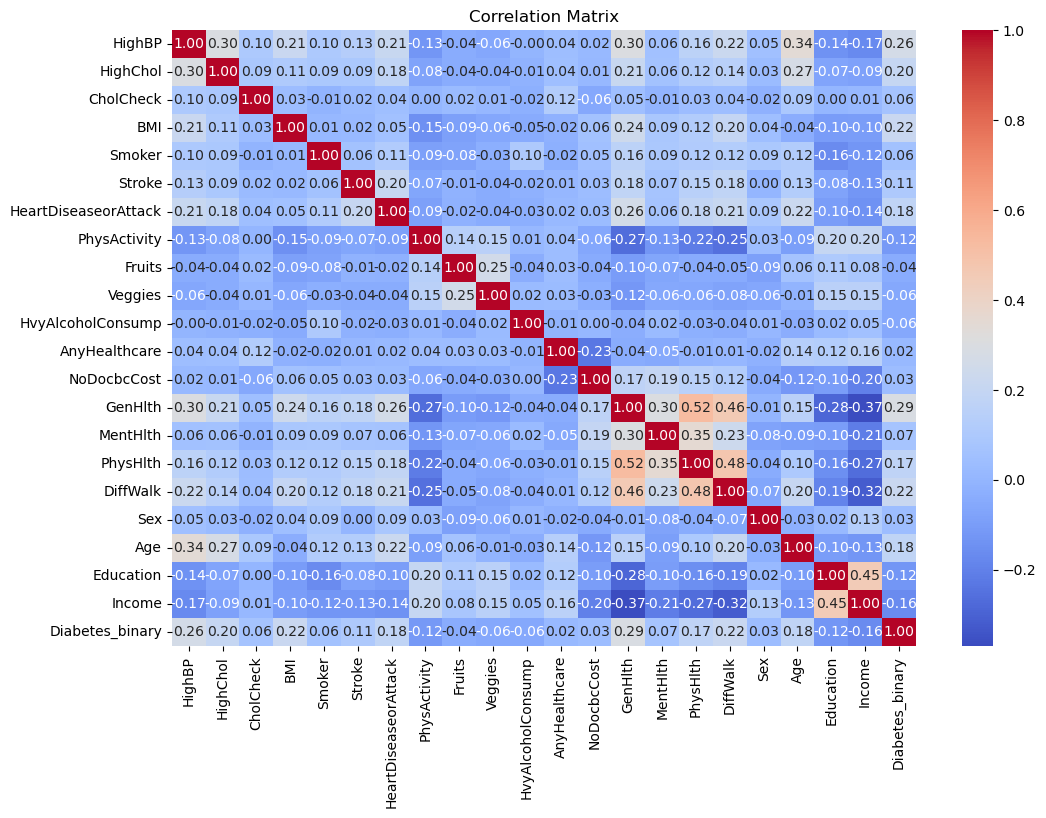

In [18]:
#prev feature_selected = X[['HighBP','GenHlth','DiffWalk','BMI','HighChol','Age','PhysHlth','HeartDiseaseorAttack','NoDocbcCost','MentHlth']]



corr_matrix = df_join.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()


In [38]:
corr_matrix 

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
HighBP,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,...,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235,0.263129
HighChol,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,...,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459,0.200276
CholCheck,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,...,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259,0.064761
BMI,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,...,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069,0.216843
Smoker,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,...,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937,0.060789
Stroke,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,...,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599,0.105816
HeartDiseaseorAttack,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,...,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011,0.177282
PhysActivity,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,...,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539,-0.118133
Fruits,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,...,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929,-0.040779
Veggies,-0.061266,-0.039874,0.006121,-0.062275,-0.030678,-0.041124,-0.039167,0.153150,0.254342,1.000000,...,-0.032232,-0.123066,-0.058884,-0.064290,-0.080506,-0.064765,-0.009771,0.154329,0.151087,-0.056584


In [29]:
weak_features = corr_matrix.loc['Diabetes_binary'].abs() < 0.1
col_names = corr_matrix.columns[weak_features].tolist()

print(corr_matrix.loc['Diabetes_binary',col_names])
print('')

print(corr_matrix.loc['Diabetes_binary',col_names].round(3).tolist())
print(col_names)


CholCheck            0.064761
Smoker               0.060789
Fruits              -0.040779
Veggies             -0.056584
HvyAlcoholConsump   -0.057056
AnyHealthcare        0.016255
NoDocbcCost          0.031433
MentHlth             0.069315
Sex                  0.031430
Name: Diabetes_binary, dtype: float64

[0.065, 0.061, -0.041, -0.057, -0.057, 0.016, 0.031, 0.069, 0.031]
['CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'Sex']


###  Removing from corr grapha

Looking at the correlation plot, we can see several features with very weak correlations to the target variable Diabetes_binary. Features with weak absolute correlations (below 0.1) are unlikely to contribute meaningfully to the model’s performance. Based on their correlation values, the following features should be considered for removal: CholCheck with a correlation of 0.064, Fruits with -0.041, Veggies with -0.057, HvyAlcoholConsump with -0.057, Sex with 0.031, AnyHealthcare with 0.016, NoDocbcCost with 0.031, and MentHlth with 0.069.



## Linear testing PCA

In [75]:

linear_var = cdc_diabetes_health_indicators.variables[
    (cdc_diabetes_health_indicators.variables['type'] != 'Binary')]['name'].tolist()


linear_var.remove('ID')
print(linear_var)

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


In [76]:
a = df_join[linear_var]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=5)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)


print(f"Explained variance by top 5 components: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)}")


Explained variance by top 5 components: [0.16713006 0.08396704 0.06480288 0.05667649 0.05512874]
Total variance explained: 0.42770521070977907


## pca resultes
In this case our varince is pretty low since it not mixed in with the other values. Also pca works better with continouts data our data is really conitnoous since it more like a caterigoricl cointius like gen health for example.

### Mutala info classificaiotn

In [31]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y['Diabetes_binary'])
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Mutual Information Scores:\n", mi_series)

print(mi_series.info())

X_reduced = X.drop(columns=mi_series[mi_series < 0.01].index)
print('')

print('eliminated features:',mi_series[mi_series < 0.01].index)

Mutual Information Scores:
 HighBP                  0.054719
GenHlth                 0.052867
AnyHealthcare           0.052002
PhysActivity            0.049290
CholCheck               0.048882
Veggies                 0.042588
Fruits                  0.040314
HighChol                0.038372
BMI                     0.030388
Sex                     0.025589
Smoker                  0.025213
Age                     0.024227
Education               0.023895
Income                  0.022751
DiffWalk                0.022626
PhysHlth                0.014492
HeartDiseaseorAttack    0.013556
Stroke                  0.004576
MentHlth                0.004159
HvyAlcoholConsump       0.003663
NoDocbcCost             0.001674
dtype: float64
<class 'pandas.core.series.Series'>
Index: 21 entries, HighBP to NoDocbcCost
Series name: None
Non-Null Count  Dtype  
--------------  -----  
21 non-null     float64
dtypes: float64(1)
memory usage: 336.0+ bytes
None

eliminated features: Index(['Stroke', 'MentHl

### random forest 

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


# Train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y['Diabetes_binary'])

rfe = RFE(model, n_features_to_select=15)  

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importances:\n", importances)

# Optional: Drop features with low importance (e.g., < 0.01)
X_reduced = X.drop(columns=importances[importances < 0.01].index)
                   
print(rfe)


Feature Importances:
 BMI                     0.183794
Age                     0.122752
Income                  0.100092
PhysHlth                0.084589
Education               0.070686
GenHlth                 0.069455
MentHlth                0.065189
HighBP                  0.043255
Smoker                  0.032792
Fruits                  0.032590
Sex                     0.028206
HighChol                0.026764
Veggies                 0.026212
PhysActivity            0.025466
DiffWalk                0.022664
HeartDiseaseorAttack    0.018110
NoDocbcCost             0.015095
Stroke                  0.012233
AnyHealthcare           0.008616
HvyAlcoholConsump       0.007814
CholCheck               0.003626
dtype: float64
RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)


In [16]:
rfe.fit(X, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

In [26]:
selected_features = X.columns[rfe.support_]
print("Selected features using RFE:", selected_features)

Selected features using RFE: Index(['HighBP', 'BMI', 'Smoker', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth',
       'Age', 'Education', 'Income'],
      dtype='object')
